# Plotting variant frequencies by genome location 
 
**Author**: Katarina Braun 


## Overview
- This notebook combines all intersection files into a single file
- Counts the total and total unique variants in this file 
- Plots each variant by freq and genome location 
- Also looks at amount of shared variation across cats 

### Reference 

Everything was mapped to the Japan reference sequence (MW219695.1) -- this is the consensus sequence for the inoculum that was used to infect the cats we are evaluating here. 

Nucleotide numbering scheme will therefore differ from the the numbering scheme used in Nextstrain. 

[Link](https://www.ncbi.nlm.nih.gov/nuccore/MW219695.1) to GenBank accession page for the reference sequence.

[Link](https://www.nejm.org/doi/full/10.1056/nejmc2013400) to the original NEJM report on transmission of SARS-CoV-2 in domestic cats by Halfmann et al. 


## Input: 

1. Cleaned vcf files: 
    - `SARSCoV2_transmission_in_domestic_cats/data_derived/cleaned/*`

## Output: 

1. CSV files with all variants and unique variats:       
     - `SARSCoV2_transmission_in_domestic_cats/data_derived/cleaned/*`


2. Figure plotting variants by frequency and genome location:   
     - `SARSCoV2_in_domestic_cats/figure/variants_across_the_genome.svg`


### import modules and dependencies

In [39]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import glob
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import splitext
from functools import reduce
from pandas.api.types import is_numeric_dtype
import warnings
from pandas.core.common import SettingWithCopyWarning
from matplotlib.font_manager import FontProperties 
from matplotlib import cm
import itertools
from matplotlib import container
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib as mpl
from pandas.plotting import table

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

# look at all SNPs

In [40]:
df1_1 = pd.read_csv("../data_derived/cleaned/1_1-intersection.csv", header=0, sep='\t')
df1_2 = pd.read_csv("../data_derived/cleaned/1_2-intersection.csv", header=0, sep='\t')
df1_3 = pd.read_csv("../data_derived/cleaned/1_3-intersection.csv", header=0, sep='\t')
df1_4 = pd.read_csv("../data_derived/cleaned/1_4-intersection.csv", header=0, sep='\t')
df1_5 = pd.read_csv("../data_derived/cleaned/1_5-intersection.csv", header=0, sep='\t')
df1_6 = pd.read_csv("../data_derived/cleaned/1_6-intersection.csv", header=0, sep='\t')
df1_7 = pd.read_csv("../data_derived/cleaned/1_7-intersection.csv", header=0, sep='\t')
df1_8 = pd.read_csv("../data_derived/cleaned/1_8-intersection.csv", header=0, sep='\t')
df2_1 = pd.read_csv("../data_derived/cleaned/2_1-intersection.csv", header=0, sep='\t')
df2_2 = pd.read_csv("../data_derived/cleaned/2_2-intersection.csv", header=0, sep='\t')
df2_3 = pd.read_csv("../data_derived/cleaned/2_3-intersection.csv", header=0, sep='\t')
df2_4 = pd.read_csv("../data_derived/cleaned/2_4-intersection.csv", header=0, sep='\t')
df2_5 = pd.read_csv("../data_derived/cleaned/2_5-intersection.csv", header=0, sep='\t')
df2_6 = pd.read_csv("../data_derived/cleaned/2_6-intersection.csv", header=0, sep='\t')
df2_7 = pd.read_csv("../data_derived/cleaned/2_7-intersection.csv", header=0, sep='\t')
df2_8 = pd.read_csv("../data_derived/cleaned/2_8-intersection.csv", header=0, sep='\t')
df3_1 = pd.read_csv("../data_derived/cleaned/3_1-intersection.csv", header=0, sep='\t')
df3_2 = pd.read_csv("../data_derived/cleaned/3_2-intersection.csv", header=0, sep='\t')
df3_3 = pd.read_csv("../data_derived/cleaned/3_3-intersection.csv", header=0, sep='\t')
df3_4 = pd.read_csv("../data_derived/cleaned/3_4-intersection.csv", header=0, sep='\t')
df3_5 = pd.read_csv("../data_derived/cleaned/3_5-intersection.csv", header=0, sep='\t')
# df3_6 = pd.read_csv("../data_derived/cleaned/3_6-intersection.csv", header=0, sep='\t')
df3_7 = pd.read_csv("../data_derived/cleaned/3_7-intersection.csv", header=0, sep='\t')
df3_8 = pd.read_csv("../data_derived/cleaned/3_8-intersection.csv", header=0, sep='\t')
df4_3 = pd.read_csv("../data_derived/cleaned/4_3-intersection.csv", header=0, sep='\t')
df4_4 = pd.read_csv("../data_derived/cleaned/4_4-intersection.csv", header=0, sep='\t')
df4_5 = pd.read_csv("../data_derived/cleaned/4_5-intersection.csv", header=0, sep='\t')
df4_6 = pd.read_csv("../data_derived/cleaned/4_6-intersection.csv", header=0, sep='\t')
df4_7 = pd.read_csv("../data_derived/cleaned/4_7-intersection.csv", header=0, sep='\t')
df4_8 = pd.read_csv("../data_derived/cleaned/4_8-intersection.csv", header=0, sep='\t')
df4_9 = pd.read_csv("../data_derived/cleaned/4_9-intersection.csv", header=0, sep='\t')
df4_10 = pd.read_csv("../data_derived/cleaned/4_10-intersection.csv", header=0, sep='\t')
df5_3 = pd.read_csv("../data_derived/cleaned/5_3-intersection.csv", header=0, sep='\t')
df5_4 = pd.read_csv("../data_derived/cleaned/5_4-intersection.csv", header=0, sep='\t')
df5_5 = pd.read_csv("../data_derived/cleaned/5_5-intersection.csv", header=0, sep='\t')
df5_6 = pd.read_csv("../data_derived/cleaned/5_6-intersection.csv", header=0, sep='\t')
df5_7 = pd.read_csv("../data_derived/cleaned/5_7-intersection.csv", header=0, sep='\t')
df5_8 = pd.read_csv("../data_derived/cleaned/5_8-intersection.csv", header=0, sep='\t')
df5_9 = pd.read_csv("../data_derived/cleaned/5_9-intersection.csv", header=0, sep='\t')
df5_10 = pd.read_csv("../data_derived/cleaned/5_10-intersection.csv", header=0, sep='\t')
# df6_3 = pd.read_csv("../data_derived/cleaned/6_3-cleaned.csv", header=0, sep='\t') # no intersection here because only one replicate worked
df6_4 = pd.read_csv("../data_derived/cleaned/6_4-intersection.csv", header=0, sep='\t')
df6_5 = pd.read_csv("../data_derived/cleaned/6_5-intersection.csv", header=0, sep='\t')
df6_6 = pd.read_csv("../data_derived/cleaned/6_6-intersection.csv", header=0, sep='\t')
df6_7 = pd.read_csv("../data_derived/cleaned/6_7-intersection.csv", header=0, sep='\t')
df6_8 = pd.read_csv("../data_derived/cleaned/6_8-intersection.csv", header=0, sep='\t')
df6_9 = pd.read_csv("../data_derived/cleaned/6_9-intersection.csv", header=0, sep='\t')
df6_10 = pd.read_csv("../data_derived/cleaned/6_10-intersection.csv", header=0, sep='\t')

In [72]:
cats = [df1_1, df1_2, df1_3, df1_4, df1_5, df1_6, df1_7, df1_8, df2_1, df2_2, df2_3, df2_4, df2_5, df2_6, df2_7, df2_8, df3_1, df3_2, df3_3, df3_4, df3_5, df3_7, df3_8, df4_3, df4_4, df4_5, df4_6, df4_7, df4_8, df4_9, df4_10, df5_3, df5_4, df5_5, df5_6, df5_7, df5_8, df5_9, df5_10, df6_4, df6_5, df6_6, df6_7, df6_8, df6_9, df6_10]



In [73]:
all_cats = pd.concat(cats)

In [74]:
all_cats.to_csv("../data_derived/cleaned/all-intersection.csv", sep='\t')

In [75]:
# save all varinats to a csv file 
all_variants = pd.read_csv("../data_derived/cleaned/all-intersection.csv", sep='\t')

# find total number of variants 
print(len(all_variants)) #total number of variants #384 total variants 

# find number of unique varints only 
all_variants = all_variants[['SNP']]
unique_all = all_variants.drop_duplicates(keep='first') 
print(len(unique_all)) #57 unique variants 

191
49


In [76]:
# figure out how many indels are here and how many variants are here and what % of these are unique 

all_variants = pd.read_csv("../data_derived/cleaned/all-intersection.csv", sep='\t')
all_variants = all_variants.rename(columns={'POS_x':'pos', '%':'freq'})

indels1 = all_variants[all_variants.SNP.str.contains('frameshift')]
indels2 = all_variants[all_variants.SNP.str.contains('inframe-deletion')]
indels = pd.concat([indels1, indels2], axis=0)
indels = indels[['SNP']]
indels.to_csv('../data_derived/cleaned/all_indels.csv', sep='\t')
indels_unique = indels.drop_duplicates(keep='first') #10 unique variants
indels_unique.to_csv('../data_derived/cleaned/unique_indels.csv', sep='\t')

snvs1 = all_variants[all_variants.SNP.str.contains('missense')]
snvs2 = all_variants[all_variants.SNP.str.contains('synonymous')]
snvs3 = all_variants[all_variants.SNP.str.contains('intergenic')]
snvs = pd.concat([snvs1, snvs2, snvs3], axis=0)
snvs = snvs[['SNP']]
snvs.to_csv('../data_derived/cleaned/all_snvs.csv', sep='\t')
snvs_unique = snvs.drop_duplicates(keep='first') # 47
snvs_unique.to_csv('../data_derived/cleaned/unique_snvs.csv', sep='\t')

print(len(indels))
print(len(indels_unique))
print(len(snvs))
print(len(snvs_unique))

61
11
130
38


In [77]:
# filter the above dataframe to make splices per gene and per annotation type 

all_variants = pd.read_csv("../data_derived/cleaned/all-intersection.csv", sep='\t')
all_variants = all_variants.rename(columns={'POS_x':'pos', '%':'freq'})

orf1ab = all_variants[all_variants['SNP'].str.contains('ORF1ab')]
orf1ab_synonymous = orf1ab[orf1ab['SNP'].str.contains('synonymous')]
orf1ab_missense = orf1ab[orf1ab['SNP'].str.contains('missense')]
orf1ab_frameshift = orf1ab[orf1ab['SNP'].str.contains('frameshift')]

spike = all_variants[all_variants['SNP'].str.contains('S_')]
spike_synonymous = spike[spike['SNP'].str.contains('synonymous')]
spike_missense = spike[spike['SNP'].str.contains('missense')]
spike_frameshift = spike[spike['SNP'].str.contains('frameshift')]

envelope = all_variants[all_variants['SNP'].str.contains('E_')]
envelope_synonymous = envelope[envelope['SNP'].str.contains('synonymous')]
envelope_missense = envelope[envelope['SNP'].str.contains('missense')]
envelope_frameshift = envelope[envelope['SNP'].str.contains('frameshift')]

# membrane = all_variants[all_variants['SNP'].str.contains('M_')] #only if you include 6_3 replicate B 
# membrane_missense = membrane[membrane['SNP'].str.contains('missense')]

orf7a_frameshift = all_variants[all_variants['SNP'].str.contains('ORF7a')]

orf8_missense = all_variants[all_variants['SNP'].str.contains('ORF8')]

N = all_variants[all_variants['SNP'].str.contains('N_')]
N_synonymous = N[N['SNP'].str.contains('synonymous')]
N_missense = N[N['SNP'].str.contains('missense')]
N_frameshift = N[N['SNP'].str.contains('frameshift' or 'deletion')]

intergenic = all_variants[all_variants['SNP'].str.contains('intergenic-region')]

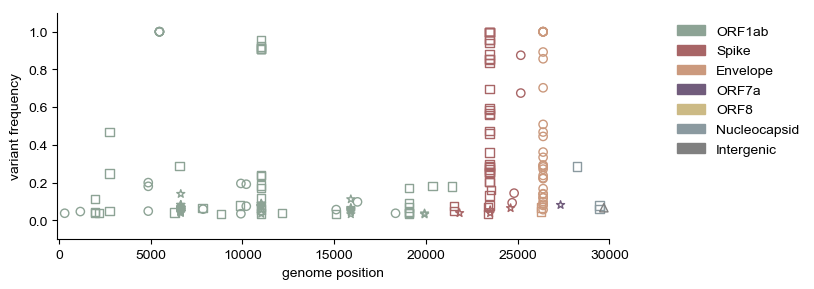

In [78]:
# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(16,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(3, 20)

ax1 = fig.add_subplot(gs[0,0:9]) 

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)  
    
plt.scatter(orf1ab_synonymous.pos, orf1ab_synonymous.freq, marker='o', edgecolor="#8DA395", facecolor='')
plt.scatter(orf1ab_missense.pos, orf1ab_missense.freq, marker='s', edgecolor="#8DA395", facecolor='')
plt.scatter(orf1ab_frameshift.pos, orf1ab_frameshift.freq, marker='*', edgecolor="#8DA395", facecolor='')

plt.scatter(spike_synonymous.pos, spike_synonymous.freq, marker='o', edgecolor="#A86566", facecolor='')
plt.scatter(spike_missense.pos, spike_missense.freq, marker='s', edgecolor="#A86566", facecolor='')
plt.scatter(spike_frameshift.pos, spike_frameshift.freq, marker='*', edgecolor="#A86566", facecolor='')

plt.scatter(envelope_synonymous.pos, envelope_synonymous.freq, marker='o', edgecolor="#CB997D", facecolor='')
plt.scatter(envelope_missense.pos, envelope_missense.freq, marker='s', edgecolor="#CB997D", facecolor='')
plt.scatter(envelope_frameshift.pos, envelope_frameshift.freq, marker='*', edgecolor="#CB997D", facecolor='')

# plt.scatter(membrane_missense.pos, membrane_missense.freq, marker='s', edgecolor="#C4AEAD", facecolor='')

plt.scatter(orf7a_frameshift.pos, orf7a_frameshift.freq, marker='*', edgecolor="#715C7C", facecolor='')

plt.scatter(orf8_missense.pos, orf8_missense.freq, marker='s', edgecolor="#CCBA85", facecolor='')

plt.scatter(N_synonymous.pos, N_synonymous.freq, marker='o', edgecolor="#8B9AA0", facecolor='')
plt.scatter(N_missense.pos, N_missense.freq, marker='s', edgecolor="#8B9AA0", facecolor='')
plt.scatter(N_frameshift.pos, N_frameshift.freq, marker='*', edgecolor="#8B9AA0", facecolor='')

plt.scatter(intergenic.pos, intergenic.freq, marker='^', edgecolor="grey", facecolor='')

# adjust axes
ax1.set_ylim([-0.1, 1.1])
ax1.set_xlim([-100,30000])

ax1.set_ylabel('variant frequency')
ax1.set_xlabel('genome position')

#legend
orf1ab = mpatches.Patch(color='#8DA395', label='ORF1ab')
spike = mpatches.Patch(color='#A86566', label='Spike')
envelope = mpatches.Patch(color='#CB997D', label='Envelope')
# membrane = mpatches.Patch(color='#C4AEAD', label='Membrane')
orf7a = mpatches.Patch(color='#715C7C', label='ORF7a')
orf8 = mpatches.Patch(color='#CCBA85', label='ORF8')
n = mpatches.Patch(color='#8B9AA0', label='Nucleocapsid')
intergenic_color = mpatches.Patch(color='grey', label='Intergenic')

plt.legend(handles=(orf1ab, spike, envelope, orf7a, orf8, n, intergenic_color), frameon=False, bbox_to_anchor=[1.1, 1])

plt.savefig("../figures/variants_across_the_genome.svg", bbox_inches='tight', dpi=300)

#

# how much of this variation is shared across cats? 

In [80]:
c1 = pd.read_csv('../data_derived/cleaned/cat1_snps_over_time.csv', sep='\t')
c1 = c1[['SNP']]
c1_unique = c1.drop_duplicates(keep='first')
c1_unique = c1_unique.rename(columns={'SNP':'variants_cat1'})
print(len(c1))
c1_unique_list = c1_unique['variants_cat1'].tolist()

#

16


In [81]:
c2 = pd.read_csv('../data_derived/cleaned/cat2_snps_over_time.csv', sep='\t')
c2 = c2[['SNP']]
c2_unique = c2.drop_duplicates(keep='first')
c2_unique = c2_unique.rename(columns={'SNP':'variants_cat2'})
print(len(c2))
c2_unique_list = c2_unique['variants_cat2'].tolist()

19


In [82]:
c3 = pd.read_csv('../data_derived/cleaned/cat3_snps_over_time.csv', sep='\t')
c3 = c3[['SNP']]
c3_unique = c3.drop_duplicates(keep='first')
c3_unique = c3_unique.rename(columns={'SNP':'variants_cat3'})
print(len(c3))
c3_unique_list = c3_unique['variants_cat3'].tolist()

16


In [83]:
c4 = pd.read_csv('../data_derived/cleaned/cat4_snps_over_time.csv', sep='\t')
c4 = c4[['SNP']]
c4_unique = c4.drop_duplicates(keep='first')
c4_unique = c4_unique.rename(columns={'SNP':'variants_cat4'})
print(len(c4))
c4_unique_list = c4_unique['variants_cat4'].tolist()

9


In [84]:
c5 = pd.read_csv('../data_derived/cleaned/cat5_snps_over_time.csv', sep='\t')
c5 = c5[['SNP']]
c5_unique = c5.drop_duplicates(keep='first')
c5_unique = c5_unique.rename(columns={'SNP':'variants_cat5'})
print(len(c5))
c5_unique_list = c5_unique['variants_cat5'].tolist()

10


In [85]:
c6 = pd.read_csv('../data_derived/cleaned/cat6_snps_over_time.csv', sep='\t')
c6 = c6[['SNP']]
c6_unique = c6.drop_duplicates(keep='first')
c6_unique = c6_unique.rename(columns={'SNP':'variants_cat6'})
print(len(c6))
c6_unique_list = c6_unique['variants_cat6'].tolist()

6


In [87]:
joined_unique_list = c1_unique_list + c2_unique_list + c3_unique_list + c4_unique_list + c5_unique_list + c6_unique_list

#